# Evaluating Regression Models

<hr style="border:2px solid gray">

1. Load your zillow dataset.

2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of taxvaluedollarcnt using only calculatedfinishedsqft.

3. Plot the residuals for the linear regression model that you made.

4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average taxvaluedollarcnt amount).

6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

7. What is the amount of variance explained in your model?

8. Is your model better than the baseline model?

9. Create a file named evaluate.py that contains the following functions.
    - plot_residuals(y, yhat): creates a residual plot
    - regression_errors(y, yhat): returns the following values:
        - sum of squared errors (SSE)
        - explained sum of squares (ESS)
        - total sum of squares (TSS)
        - mean squared error (MSE)
        - root mean squared error (RMSE)
    - baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
    - better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

<hr style="border:1px solid black">
<hr style="border:1px solid black">

In [1]:
#import ignore warninings
import warnings
warnings.filterwarnings("ignore")

#standard ds imports
import pandas as pd
import numpy as np
from pydataset import data

#visualization imports
import matplotlib.pyplot as plt
import seaborn as sns

#math imports
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import explained_variance_score

#custom import
import wrangle

### #1. Load your ```zillow``` dataset.

In [2]:
#use the wrangle module to call our custom function
train, validate, test = wrangle.wrangle_zillow()

train: (1033073, 7)
validate: (442746, 7)
test: (368955, 7)


In [3]:
#take a look at the data
train.head()

,bedrooms,bathrooms,sqft,home_value,year_built,sale_tax,fips
98009,3.0,3.0,2630.0,467280.0,1959.0,5822.39,6037.0
1302707,4.0,2.0,1576.0,220764.0,1985.0,2801.04,6037.0
1400834,3.0,2.0,1517.0,86868.0,1951.0,1097.60,6037.0
1750528,3.0,2.0,1447.0,215803.0,1949.0,2992.81,6037.0
1573330,3.0,2.0,1919.0,301935.0,1959.0,3766.34,6037.0


In [4]:
#make sure we have the correct dtypes and no nulls
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1033073 entries, 98009 to 1310779
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   bedrooms    1033073 non-null  float64
 1   bathrooms   1033073 non-null  float64
 2   sqft        1033073 non-null  float64
 3   home_value  1033073 non-null  float64
 4   year_built  1033073 non-null  float64
 5   sale_tax    1033073 non-null  float64
 6   fips        1033073 non-null  float64
dtypes: float64(7)
memory usage: 63.1 MB


<hr style="border:1px solid black">

### #2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of ```taxvaluedollarcnt``` using only ```calculatedfinishedsqft```.

<div class="alert alert-block alert-info">
<b>Note:</b> 
    <br>

These exercises only call for 2 features to be used. For this, we can drop the other columns that we will not be using.
</div>

In [5]:
#drop columns we don't need 
train = train.drop(columns=['bed_count','bath_count',
                    'yearbuilt','taxamount', 'fips'])

In [6]:
#make sure we only have the columns we need for the exercises
train.head(3)

,sqft,home_value
98009,2630.0,467280.0
1302707,1576.0,220764.0
1400834,1517.0,86868.0


<div class="alert alert-block alert-info">
<b>Note:</b> 
    <br>

Prior to creating our model, we will want to scale our features.
</div>

In [7]:
#use minmax on area only
MinMax = MinMaxScaler()

train['sqr_ft'] = MinMax.fit_transform(train[['sqr_ft']])

In [8]:
#make sure we have scaled data
train.head(3)

,sqft,home_value
98009,0.770968,467280.0
1302707,0.461877,220764.0
1400834,0.444575,86868.0


In [9]:
#let's make sure our sqft is in between 0 and 1
train.describe().loc[['count','min','max']]

,sqft,home_value
count,1033073.0,1033073.0
min,0.0,23.0
max,1.0,949902.0


<div class="alert alert-block alert-info">
<b>Note:</b> 
    <br>

Be sure to isolate X and y <u>prior</u> to fitting your model.
</div>

In [10]:
#isolate X and y train 
##using only the features that are requested for exercise #2
X_train = train[['sqr_ft']]
y_train = train[['tax_val_usd']]

X_validate = validate[['sqr_ft']]
y_validate = validate[['tax_val_usd']]

X_test = test[['sqr_ft']]
y_test = test[['tax_val_usd']]

In [11]:
#make sure we have what we need
X_train.head(3)

,sqft
98009,0.770968
1302707,0.461877
1400834,0.444575


In [12]:
#make sure we have what we need
y_train.head(3)

,home_value
98009,467280.0
1302707,220764.0
1400834,86868.0


In [13]:
#fit the model
model = LinearRegression().fit(X_train, y_train)

#make sure the model is made
model

LinearRegression()

In [14]:
#use the model
predictions = model.predict(X_train)

#take a look at the predictions
predictions

array([[472999.47132013],
       [316343.01783735],
       [307573.82357218],
       ...,
       [244405.89878074],
       [267146.35170566],
       [265660.04759292]])

In [15]:
#create a column that contains just the predictions
train['yhat'] = predictions

In [16]:
#take a look at our predictions
train.head(3)

,sqft,home_value,yhat
98009,0.770968,467280.0,472999.471320
1302707,0.461877,220764.0,316343.017837
1400834,0.444575,86868.0,307573.823572


<hr style="border:1px solid black">

### #3. Plot the residuals for the linear regression model that you made.

<div class="alert alert-block alert-info">
<b>Note:</b> 
    <br>

<u>Residual</u>: our prediction value (yhat) minus our target variable value 
<br>

Residual = yhat-y
<br>

<b>Important</b>: You can use 'y - yhat' as well for residual. Both are correct but 'yhat - y' is easier to conceptualize   
</div>

In [17]:
#create a column for residual
train['residuals'] =  train.yhat - train.home_value

In [18]:
#take a look at our columns
train.head(3)

,sqft,home_value,yhat,residuals
98009,0.770968,467280.0,472999.471320,5719.471320
1302707,0.461877,220764.0,316343.017837,95579.017837
1400834,0.444575,86868.0,307573.823572,220705.823572


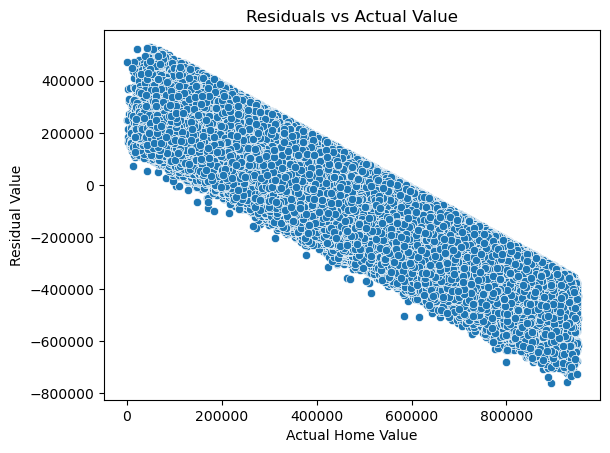

In [19]:
#let's visualize our actual vs our residuals
sns.scatterplot(data=train, x='tax_val_usd', y='residuals')

plt.xlabel('Actual Home Value')
plt.ylabel('Residual Value')
plt.title('Residuals vs Actual Value')
plt.show()

<hr style="border:1px solid black">

### #4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

<b>a. ```SSE```: Sum of Squared Errors</b>

<div class="alert alert-block alert-info">
<b>Note:</b> 
    <br>

<u>SSE</u>: (AKA: RSS- residual sum of squares) Square the residuals one at a time, and take the sum of all of them. Calculating how much error there is in our models predictions. By squaring it, we do not have to worry about the sign (+ or -). Entire addition of how much we missed.
</div>

In [20]:
#calculate sum of squared errors (SSE)
SSE = (train.residuals **2).sum()
SSE

3.3497004136503416e+16

<b>b. ```ESS```: Explained Sum of Squares</b>

<div class="alert alert-block alert-info">
<b>Note:</b> 
    <br>

<u>ESS</u>: the sum of the difference between the each predicted value (yhat) and the mean of all actual values
</div>

In [21]:
ESS = ((train.yhat - train.home_value.mean())**2).sum()
ESS

7275587158661324.0

<b>c. ```TSS```: Total Sum of Squares</b>

<div class="alert alert-block alert-info">
<b>Note:</b> 
    <br>

<u>TSS</u>: the sum of difference between the actual home value and the mean of all home values. It can also be derived by summing the ESS and SSE
</div>

In [22]:
TSS = ESS + SSE
TSS

4.077259129516474e+16

<b>d. ```MSE```: Mean Squared Errors</b>

<div class="alert alert-block alert-info">
<b>Note:</b> 
    <br>

<u>MSE</u>: Take the sum of squared error (SSE), then divide by number of operations.  
</div>

In [23]:
#one way to accomplish this
SSE/len(train.yhat)

32424624529.441208

In [24]:
#another way to accomplish this using a library
MSE = mean_squared_error(train.home_value, train.yhat)
MSE

32424624529.441208

<b>e. ```RMSE```: Root Mean Squared Errors</b>

<div class="alert alert-block alert-info">
<b>Note:</b> 
    <br>
<u>RMSE</u>: On average, this is how often we missed our mark.
<br>
    
We want our RMSE (amount of error left over from model predictions) to be smaller. The closer to 0 the better.
<br>

In [25]:
#take the square root of Mean Squared Error
RMSE = MSE**.5
RMSE

180068.38847904763

In [26]:
#another way to accomplish this using sqft function from math library
math.sqrt(MSE)

180068.38847904763

<hr style="border:1px solid black">

### #5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average ```taxvaluedollarcnt``` amount).

<div class="alert alert-block alert-info">
<b>Note:</b> 
    <br>

<u>Baseline</u>: the mean of our target variable. This value will remain constant.
<br>

In [27]:
#create our baseline column
train['baseline'] = train.home_value.mean()

<b>MSE</b>

In [28]:
MSE_baseline = mean_squared_error(train.home_value, train.baseline)
MSE_baseline

39467289625.38667

In [29]:
#create a column for SSE baseline column
train['MSE_baseline'] = MSE_baseline

<b>SSE</b>

In [30]:
SSE_baseline = MSE_baseline * len(train)
SSE_baseline

4.077259129516709e+16

In [31]:
#create a column for SSE baseline column
train['SSE_baseline'] = SSE_baseline

<b>RMSE</b>

In [32]:
RMSE_baseline = MSE_baseline**.5
RMSE_baseline

198663.76022160327

In [33]:
#create a column for RMSE baseline column
train['RMSE_baseline'] = RMSE_baseline

In [34]:
#take a look
train.head(3)

,sqft,home_value,yhat,residuals,baseline,MSE_baseline,SSE_baseline,RMSE_baseline
98009,0.770968,467280.0,472999.471320,5719.471320,328045.322681,3.946729e+10,4.077259e+16,198663.760222
1302707,0.461877,220764.0,316343.017837,95579.017837,328045.322681,3.946729e+10,4.077259e+16,198663.760222
1400834,0.444575,86868.0,307573.823572,220705.823572,328045.322681,3.946729e+10,4.077259e+16,198663.760222


<hr style="border:1px solid black">

### #6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [35]:
if SSE < SSE_baseline:
    print('My OSL model performs better than baseline')
else:
    print('My OSL model performs worse than baseline. :( )')

My OSL model performs better than baseline


<hr style="border:1px solid black">

### #7. What is the amount of variance explained in your model?

In [36]:
#First, let's perform this manually
R2 = ESS / TSS
R2

0.1784430895252945

In [37]:
#make it pretty
print('R-squared = ',round(R2,3))
print("Percent of variance = ", round(R2*100,1), "%")

R-squared =  0.178
Percent of variance =  17.8 %


In [38]:
#now, we can use sklearn function for R2 score
r2_score(train.home_value, train.yhat)

0.17844308952534182

In [39]:
#explained variance score- using import
evs = explained_variance_score(train.home_value, train.yhat)
print('Explained Variance = ', round(evs,3))

Explained Variance =  0.178


<hr style="border:1px solid black">

### #8. Is your model better than the baseline model?

In [40]:
RMSE_baseline - RMSE

18595.37174255564

In [41]:
if RMSE < RMSE_baseline:
    print(f'The model rmse performs better the rmse_baseline')
else:
    print(f'The model rmse performs worse than the rmse_baseline')

The model rmse performs better the rmse_baseline


- Yes! The model does perform better than the baseline, but it is still not an ideal model. We can do better.

<hr style="border:1px solid black">

### #9. Create a file named evaluate.py that contains the following functions.

<b>a. ```plot_residuals(y, yhat)```: creates a residual plot</b>

In [42]:
def plot_residuals(y, yhat):
    '''
    This function takes in actual value and predicted value 
    then creates a scatter plot of those values
    '''
    residuals = y - yhat
    
    plt.scatter(x=y, y=residuals)
    plt.xlabel('Home Value')
    plt.ylabel('Residuals')
    plt.title('Residual vs Home Value Plot')
    plt.show()

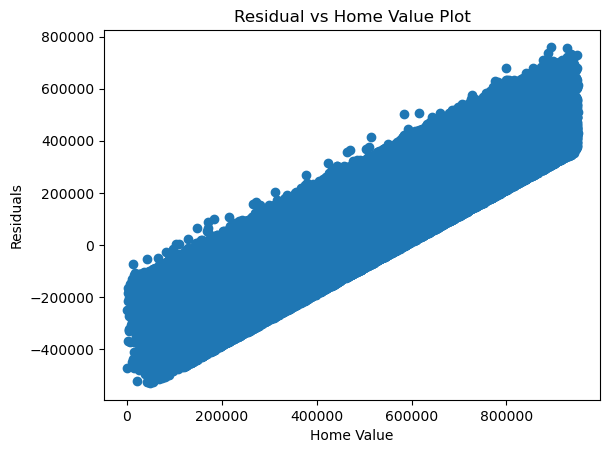

In [43]:
#use the function we just created
plot_residuals(train.home_value, train.yhat)

<hr style="border:0.5px solid black">

<b>b. ```regression_errors(y, yhat)```: returns the following values:</b>

In [44]:
def regression_errors(y, yhat):
    '''
    This function takes in actual value and predicted value 
    then outputs: the sse, ess, tss, mse, and rmse
    '''
    MSE = mean_squared_error(y, yhat)
    SSE = MSE * len(y)
    RMSE = math.sqrt(MSE)
    ESS = ((yhat - y.mean())**2).sum()
    TSS = ESS + SSE
           
    print(f'SSE: {SSE: .4f}')
    print(f'ESS: {ESS: .4f}')
    print(f'TSS: {TSS: .4f}')
    print(f'MSE: {MSE: .4f}')
    print(f'RMSE: {RMSE: .4f}')

    return MSE, SSE, RMSE, ESS, TSS

In [45]:
regression_errors(train.home_value, train.yhat)

SSE:  33497004136503416.0000
ESS:  7275587158661324.0000
TSS:  40772591295164736.0000
MSE:  32424624529.4412
RMSE:  180068.3885


(32424624529.441208,
 3.3497004136503416e+16,
 180068.38847904763,
 7275587158661324.0,
 4.077259129516474e+16)

<hr style="border:0.5px solid black">

<b>c. ```baseline_mean_errors(y)```: computes the SSE, MSE, and RMSE for the baseline model</b>

In [46]:
def baseline_mean_errors(y):
    baseline = np.repeat(y.mean(), len(y))
    
    MSE = mean_squared_error(y, baseline)
    SSE = MSE * len(y)
    RMSE = MSE**.5
    
    print(f'sse_baseline: {SSE: .4f}')
    print(f'mse_baseline: {MSE: .4f}')
    print(f'rmse_baseline: {RMSE: .4f}')
    
    return MSE, SSE, RMSE

In [47]:
baseline_mean_errors(train.home_value)

sse_baseline:  40772591295167088.0000
mse_baseline:  39467289625.3867
rmse_baseline:  198663.7602


(39467289625.38667, 4.077259129516709e+16, 198663.76022160327)

<hr style="border:0.5px solid black">

<b>d. ```better_than_baseline(y, yhat)```: returns true if your model performs better than the baseline, otherwise false</b>

In [48]:
def better_than_baseline(y, yhat):
    '''
    This function takes in the target and the prediction
    then returns a print statement 
    to inform us if the model outperforms the baseline
    '''
    SSE, ESS, TSS, MSE, RMSE = regression_errors(y, yhat)
    
    SSE_baseline, MSE_baseline, RMSE_baseline = baseline_mean_errors(y)
    
    if SSE < SSE_baseline:
        print('My OSL model performs better than baseline')
    else:
        print('My OSL model performs worse than baseline. :( )')

In [49]:
better_than_baseline(train.home_value, train.yhat)

SSE:  33497004136503416.0000
ESS:  7275587158661324.0000
TSS:  40772591295164736.0000
MSE:  32424624529.4412
RMSE:  180068.3885
sse_baseline:  40772591295167088.0000
mse_baseline:  39467289625.3867
rmse_baseline:  198663.7602
My OSL model performs better than baseline


<hr style="border:2px solid gray">
<hr style="border:2px solid gray">

# Bonus

1. Load the tips dataset from either pydataset or seaborn. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

2. Load the mpg dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your evaluate.py to help accomplish this.

### #1. Load the tips dataset from either pydataset or seaborn. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

In [50]:
tips_df = data('tips')

In [51]:
tips_df.head(3)

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3


In [52]:
tips_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 1 to 244
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 15.2+ KB


In [53]:
#create and fit the model
model = LinearRegression().fit(tips_df[['total_bill']], tips_df[['tip']])

In [54]:
#use the model
tips_df['yhat'] = model.predict(tips_df[['total_bill']])

In [55]:
#create new column with baseline
tips_df['yhat_baseline'] = tips_df.total_bill.mean()

In [56]:
tips_df.total_bill.describe()

count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64

In [57]:
tips_df.head(3)

,total_bill,tip,sex,smoker,day,time,size,yhat,yhat_baseline
1,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,19.785943
2,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,19.785943
3,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,19.785943


In [58]:
tips_df['baseline_residuals'] = tips_df.tip - tips_df.yhat_baseline
tips_df['residuals'] = tips_df.tip - tips_df.yhat

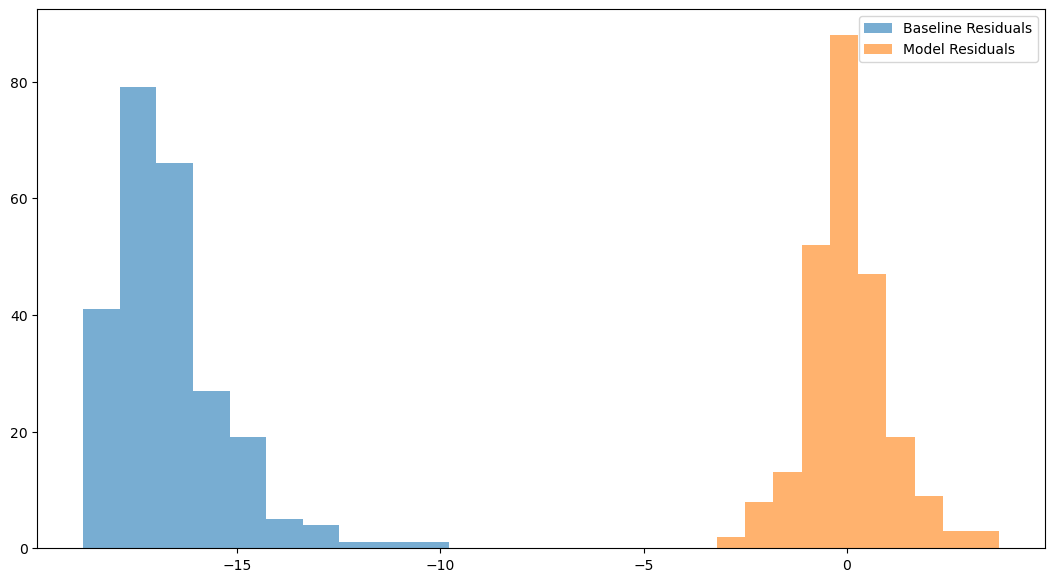

In [59]:
#plot baseline over residuals
fig, ax = plt.subplots(figsize=(13,7))

ax.hist(tips_df.baseline_residuals, label='Baseline Residuals', alpha = .6)
ax.hist(tips_df.residuals, label='Model Residuals', alpha = .6)
ax.legend()
plt.show()

### #2. Load the mpg dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your evaluate.py to help accomplish this.

In [61]:
import evaluate

In [62]:
#import mpg
mpg = data('mpg')

In [63]:
#create and fit the model
model = LinearRegression().fit(mpg[['displ']], mpg.hwy)

In [64]:
#y
#use the model
mpg['actual'] = mpg['hwy']

In [65]:
#y
#use the model
mpg['actual'] = mpg['hwy']
#yhat
mpg['predicted'] = model.predict(mpg[['displ']])

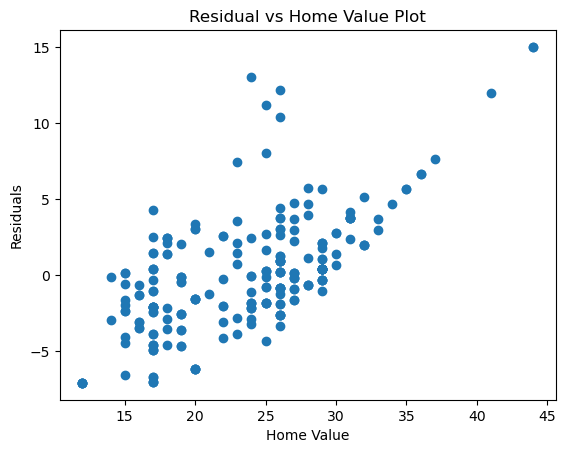

In [66]:
#use function created
evaluate.plot_residuals(mpg.actual, mpg.predicted)

In [68]:
#use function created
evaluate.regression_errors(mpg.actual, mpg.predicted)

SSE:  3413.8290
ESS:  4847.8334
TSS:  8261.6624
MSE:  14.5890
RMSE:  3.8196


(14.589012858954984,
 3413.829008995466,
 3.819556631201452,
 4847.833384166938,
 8261.662393162405)

In [69]:
#use function created
evaluate.baseline_mean_errors(mpg.actual)

sse_baseline:  8261.6624
mse_baseline:  35.3062
rmse_baseline:  5.9419


(35.30624954342902, 8261.66239316239, 5.941906221359356)

In [70]:
#use function created
evaluate.better_than_baseline(mpg.actual, mpg.predicted)

SSE:  3413.8290
ESS:  4847.8334
TSS:  8261.6624
MSE:  14.5890
RMSE:  3.8196
sse_baseline:  8261.6624
mse_baseline:  35.3062
rmse_baseline:  5.9419
My OSL model performs better than baseline
